# Sech - Modulus of Continuity

In [76]:
from matplotlib import pyplot as plot

from scipy.optimize import fsolve, minimize
from sympy import Symbol, lambdify

import DistExampB as db

from Map import LogRatio
from LocUtil import Grid1, IndexOf, LogGrid1, Sub

In [2]:
nPlot = 201

#### problem

In [3]:
dist = db.ExampB()

#### maping

In [4]:
xSym = Symbol('x')
zSym = Symbol('z')
map_ = LogRatio(xSym, zSym, xRange=(0, 2))
map_.forSym

log(x/(2 - x))

In [5]:
X2Z = map_.Forward
Z2X = map_.Inverse

## Modulus of Connectivity

In [6]:
func = dist.pdfSym.subs(xSym, map_.invSym).simplify()
func

-(3*cos(3*pi*exp(z)/(exp(z) + 1)) - 3)/(4*cosh(z/2)**2)

In [7]:
Func = lambdify(zSym, func)
FuncNeg = lambda z: -Func(z)

Text(0.5, 0, 'z')

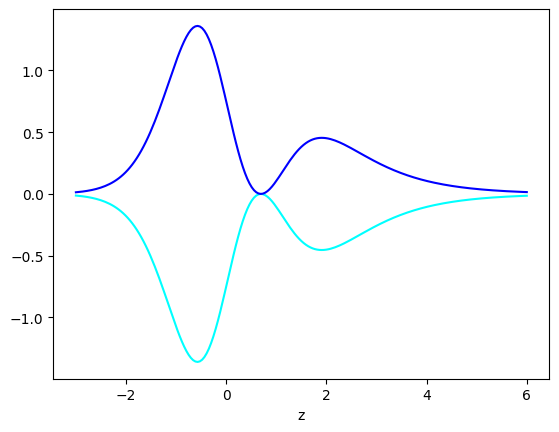

In [22]:
zGrid = Grid1(-3,6, nPlot)

fGrid = tuple(Func(z) for z in zGrid)
plot.plot(zGrid,fGrid, c='blue')

fNegGrid = tuple(FuncNeg(z) for z in zGrid)
plot.plot(zGrid, fNegGrid, c='cyan', zorder=-1)

plot.xlabel('z')

In [23]:
critP = (minimize(FuncNeg, -1).x[0], minimize(Func, 0).x[0], minimize(FuncNeg, 2).x[0])
critP

(-0.5734293143168716, 0.693146464618056, 1.906607593572242)

In [63]:
def MaxSepAt(F, x, h, critP):
	critPoint = (x - h, x + h)
	
	critIndex = IndexOf(critP, lambda x0: (x - h <= x0) and (x0 <= x + h))
	if 0 < len(critIndex):
		critPoint += tuple(Sub(critP, critIndex))
	# print(critPoint)
	
	dev = tuple(abs(F(x) - F(x0)) for x0 in critPoint)
	# print(dev)
	
	return max(dev)

In [64]:
MaxSepAt(Func,0,1/8,critP)

0.21951359696027928

Text(0, 0.5, 'PDF')

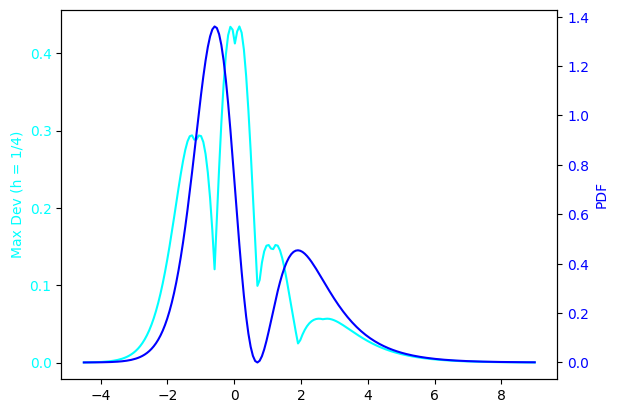

In [67]:
fig,ax0 = plot.subplots()

# 
zGrid = Grid1(-4.5,9, nPlot)
maxSep = tuple(MaxSepAt(Func, z, 1/4, critP) for z in zGrid)

ax0.plot(zGrid,maxSep, c='cyan')
ax0.set_ylabel(f'Max Dev (h = 1/4)', c='cyan')
ax0.tick_params(axis='y', labelcolor='cyan')

# plot pdf
ax1 = ax0.twinx()
func = tuple(Func(z) for z in zGrid)

ax1.plot(zGrid,func, c='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylabel('PDF', c='blue')  

In [106]:
def MaxSep(F, h):
	result = minimize(lambda z: -MaxSepAt(F,z,h,critP), -0.3)
	return result

In [107]:
-MaxSep(Func,1/4).fun

0.43453044295108934

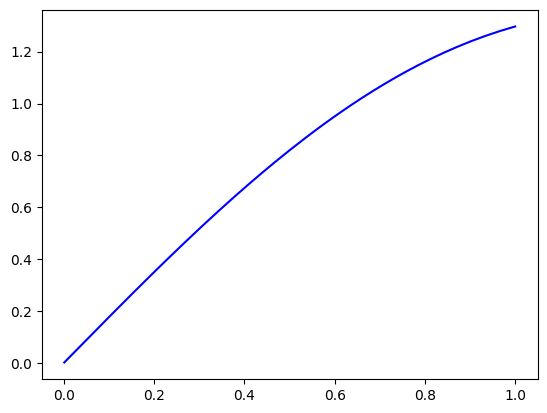

In [108]:
hGrid = LogGrid1(1e-3,1, nPlot)
contMod = tuple(-MaxSep(Func,h).fun for h in hGrid)

plot.plot(hGrid,contMod, c='blue')

This is a rather silly workbook.  The modulus of continuity approaches h times the absolute value 
of the maximum derivative for a different function.

In [109]:
temp = dist.pdfSym.subs(xSym, map_.invSym).diff(zSym).simplify()
temp

3*(exp(2*z)*cos(3*pi*exp(z)/(exp(z) + 1)) - exp(2*z) + 3*pi*exp(z)*sin(3*pi*exp(z)/(exp(z) + 1)) - cos(3*pi*exp(z)/(exp(z) + 1)) + 1)*exp(z)/(exp(4*z) + 4*exp(3*z) + 6*exp(2*z) + 4*exp(z) + 1)

In [110]:
F1 = lambdify(zSym, temp)

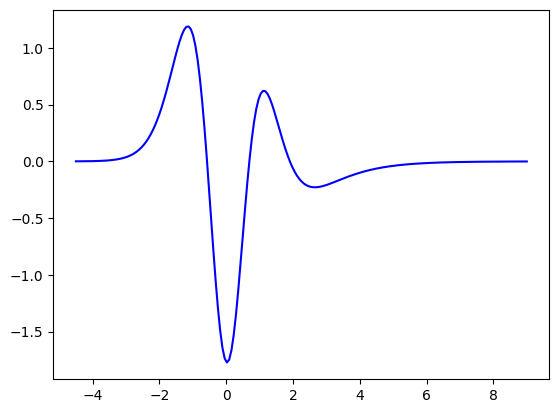

In [111]:
zGrid = Grid1(-4.5,9, nPlot)
fPrime = tuple(F1(z) for z in zGrid)

plot.plot(zGrid,fPrime, c='blue')

In [112]:
maxSlope = -minimize(F1, 0).fun
maxSlope

1.7724163283843546

Text(0, 0.5, 'Modulus of Continuity')

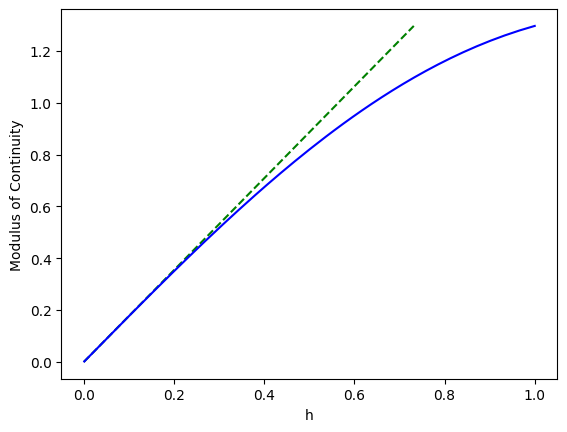

In [113]:
hGrid = LogGrid1(1e-3,1, nPlot)
contMod = tuple(-MaxSep(Func,h).fun for h in hGrid)
plot.plot(hGrid,contMod, c='blue')

hGrid = Grid1(0, max(contMod)/maxSlope, nPlot)
lim = tuple(h * maxSlope for h in hGrid)
plot.plot(hGrid,lim, '--', c='green', zorder=-1)

plot.xlabel('h')
plot.ylabel('Modulus of Continuity')